In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Download**

In [2]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [4]:
!kaggle datasets download -d crawford/deepsat-sat4

100% 2.98G/2.98G [00:44<00:00, 49.6MB/s]
100% 2.98G/2.98G [00:44<00:00, 71.3MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  deepsat-sat4.zip
  inflating: X_test_sat4.csv         
  inflating: X_train_sat4.csv        
  inflating: sat-4-full.mat          
  inflating: sat4annotations.csv     
  inflating: y_test_sat4.csv         
  inflating: y_train_sat4.csv        


##L**oading and Categrozing the data**

In [7]:
#import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imshow

from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential

In [8]:
#Reading dataset
X = pd.read_csv("/content/drive/MyDrive/Kaggle/X_test_sat4.csv") #values are in DataFrame format
Y = pd.read_csv("/content/drive/MyDrive/Kaggle/y_test_sat4.csv") #values are in DataFrame format
X = np.array(X) # converting Dataframe to numpy array
Y = np.array(Y) # converting Dataframe to numpy array

In [9]:
#Shape of data used
print("Train data shape: ",X.shape)

Train data shape:  (99999, 3136)


In [10]:
#reshaping (99999, 3136) to (99999, 28, 28, 4)
X = X.reshape([99999,28,28,4]).astype(float)
print("Reshaped data format: ",X.shape)

Reshaped data format:  (99999, 28, 28, 4)


In [11]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) 

In [12]:
#format of train and test data
print("X train data shape: ",x_train.shape)
print("Y train data shape: ",y_train.shape)
print("X test data shape: ",x_test.shape)
print("Y test data shape: ",y_test.shape)

X train data shape:  (79999, 28, 28, 4)
Y train data shape:  (79999, 4)
X test data shape:  (20000, 28, 28, 4)
Y test data shape:  (20000, 4)


**Four type of classification is possible i.e**
* if y_train[x] == [1,0,0,0] Barren land(Drought)
* if y_train[x] == [0,1,0,0] Forest land
* if y_train[x] == [0,0,1,0] Grassland
* if y_train[x] == [0,0,0,1] Others

In [13]:
#normalizing train and test data
x_train = x_train/255
x_test = x_test/255

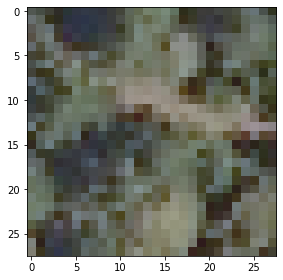

Ground Truth: Forest Land


In [14]:
#Images in the data with its label(reduced image)
img_no = 100 #type a random number in inclusive range 0 to 79999
imshow(np.squeeze(x_train[img_no,:,:,0:3]).astype(float)) #taking only RGB format
plt.show()
print ('Ground Truth: ',end='')
if y_train[img_no, 0] == 1:
    print ('Barren Land')
elif y_train[img_no, 1] == 1:
    print ('Forest Land')
elif y_train[img_no, 2] == 1:
    print ('Grassland')
else:
    print ('Other')

Using **Convulutional Neural Network**

In [16]:
#defining layers
num_classes = 4
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,4),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, input_shape=(3136,), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#CNN Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        1184      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [18]:
#fitting the data into the model
model.fit(x_train,y_train,batch_size=64, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
1000/1000 [==============================] - 17s 6ms/step - loss: 0.2430 - accuracy: 0.9076 - val_loss: 0.0950 - val_accuracy: 0.9716
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1041 - accuracy: 0.9632 - val_loss: 0.0777 - val_accuracy: 0.9725
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0845 - accuracy: 0.9702 - val_loss: 0.1013 - val_accuracy: 0.9651
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0670 - accuracy: 0.9763 - val_loss: 0.0530 - val_accuracy: 0.9827
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0642 - accuracy: 0.9772 - val_loss: 0.0887 - val_accuracy: 0.9704
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0550 - accuracy: 0.9806 - val_loss: 0.0485 - val_accuracy: 0.9843
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0563 - accuracy: 0.9805 - val_loss: 0.0737 - val_accuracy

In [19]:
#predicting model performance
preds = model.predict(x_test, verbose=1)

625/625 [==============================] - 2s 2ms/step


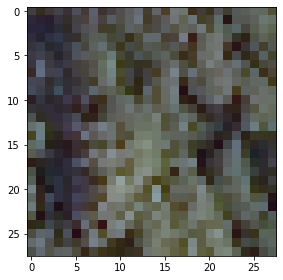

Predicted Label: Forest Land
Actual label: Forest Land


In [24]:
img_no = 200#Type a number between 0 and 20000 inclusive
imshow(np.squeeze(x_test[img_no,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Predicted classification
print ('Predicted Label: ',end='')
if preds[img_no, 0]*100  >= 80:
    print ('Barren Land')
elif preds[img_no, 1]*100 >= 80:
    print ('Forest Land')
elif preds[img_no, 2]*100 >= 80:
    print ('Grassland')
else:
    print ('Other')

#Acutal classification
print ('Actual label: ',end='')
if y_test[img_no, 0] == 1:
    print ('Barren Land')
elif y_test[img_no, 1] == 1:
    print ('Forest Land')
elif y_test[img_no, 2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [21]:
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

Accuracy score:  0.9908
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5223
           1       1.00      1.00      1.00      4121
           2       0.97      0.99      0.98      3596
           3       1.00      1.00      1.00      7060

   micro avg       0.99      0.99      0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000
 samples avg       0.99      0.99      0.99     20000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("Accuracy of CNN model is: ", accuracy_score(y_test,np.round_(preds))*100)

Accuracy of CNN model is:  99.08
